In [39]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

import os
import zipfile

import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

transactions = pd.read_csv(
        "../data/sales_train.csv.gz", 
        parse_dates=['date'], 
        dayfirst=True, 
        infer_datetime_format=True
        )

In [40]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [41]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [59]:
transactions['year']=pd.to_datetime(transactions['date'].values).year
transactions['month']=pd.to_datetime(transactions['date'].values).month

In [60]:
transactions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1
5,2013-01-10,0,25,2564,349.00,1.0,2013,1
6,2013-01-02,0,25,2565,549.00,1.0,2013,1
7,2013-01-04,0,25,2572,239.00,1.0,2013,1
8,2013-01-11,0,25,2572,299.00,1.0,2013,1
9,2013-01-03,0,25,2573,299.00,3.0,2013,1


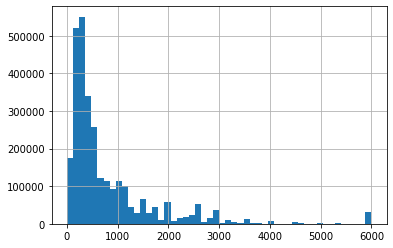

In [61]:
transactions.item_price.clip(transactions.item_price.quantile(0.01), transactions.item_price.quantile(0.99)).hist(bins=50)

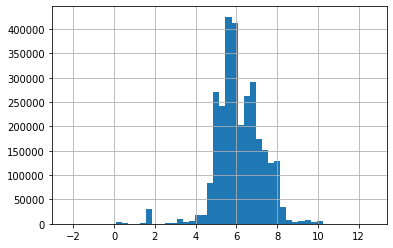

In [62]:
np.log1p(0.1 + transactions.item_price).hist(bins=50)

In [63]:
dd = transactions.groupby('item_id')[['item_price', 'item_cnt_day']].agg(['sum', 'mean'])[[('item_price', 'mean'), ('item_cnt_day', 'sum')]]
dd.columns = dd.columns.droplevel(1)

In [64]:
dd

,item_price,item_cnt_day
item_id,,
0,58.000000,1.0
1,4490.000000,6.0
2,58.000000,2.0
3,79.000000,2.0
4,58.000000,1.0
5,28.000000,1.0
6,100.000000,1.0
7,28.000000,1.0
8,58.000000,2.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


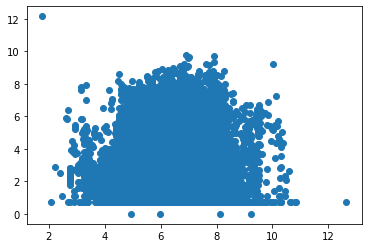

In [65]:
plt.scatter(np.log1p(dd.item_price), np.log1p(dd.item_cnt_day))

In [66]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 8 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
year              int64
month             int64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 179.2 MB


In [29]:
rev = transactions.groupby(['shop_id', 'date']).apply(lambda x: np.dot(x.item_price, x.item_cnt_day))

In [34]:
rev2 = rev.reset_index(1)

In [37]:
rev3 = rev2.rename(columns={0: 'revenue'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

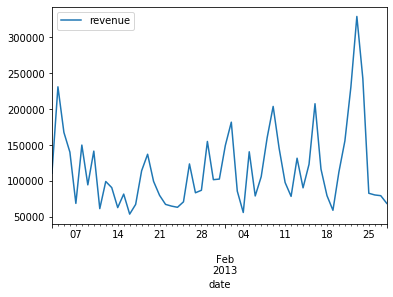

<Figure size 432x288 with 0 Axes>

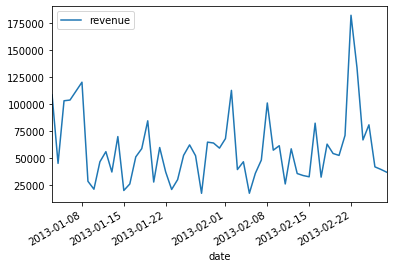

<Figure size 432x288 with 0 Axes>

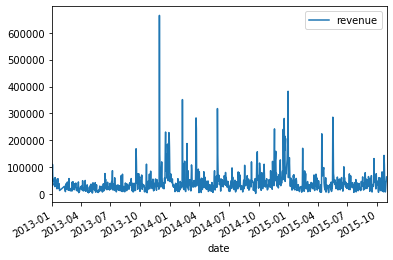

<Figure size 432x288 with 0 Axes>

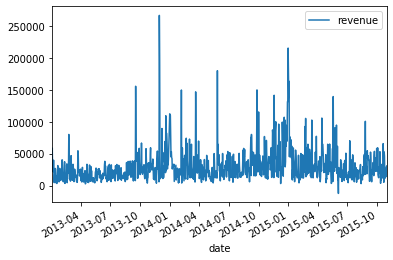

<Figure size 432x288 with 0 Axes>

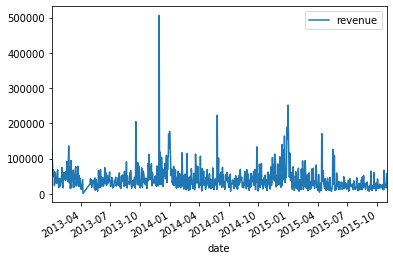

<Figure size 432x288 with 0 Axes>

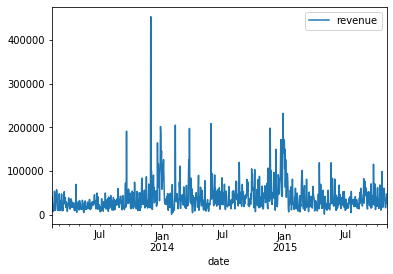

<Figure size 432x288 with 0 Axes>

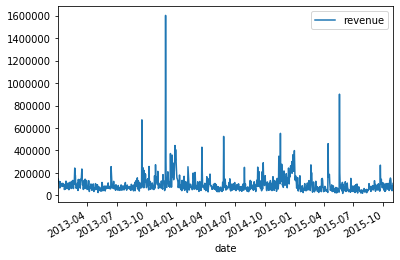

<Figure size 432x288 with 0 Axes>

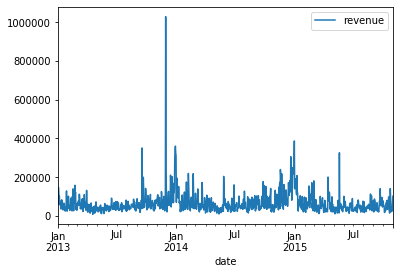

<Figure size 432x288 with 0 Axes>

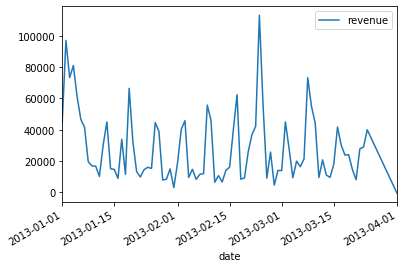

<Figure size 432x288 with 0 Axes>

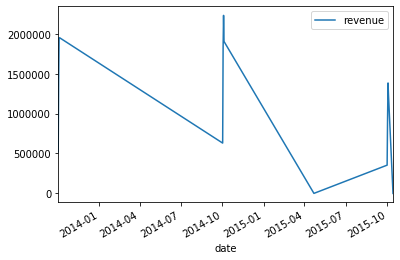

<Figure size 432x288 with 0 Axes>

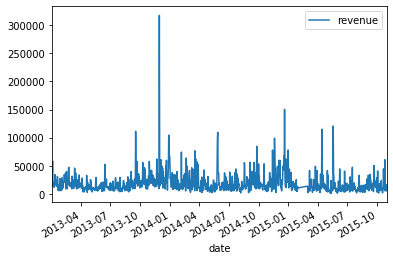

<Figure size 432x288 with 0 Axes>

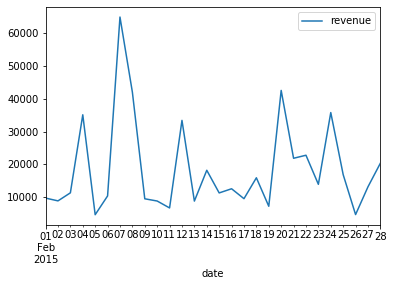

<Figure size 432x288 with 0 Axes>

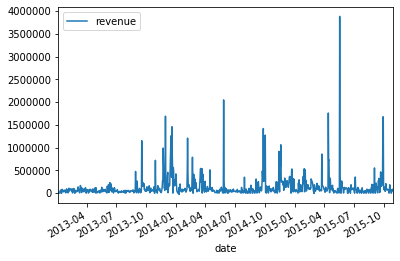

<Figure size 432x288 with 0 Axes>

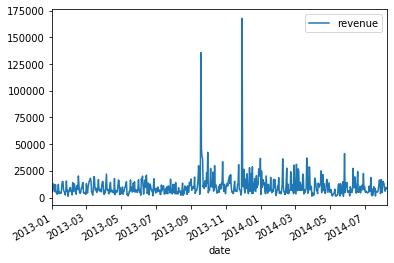

<Figure size 432x288 with 0 Axes>

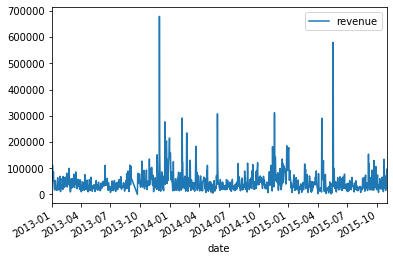

<Figure size 432x288 with 0 Axes>

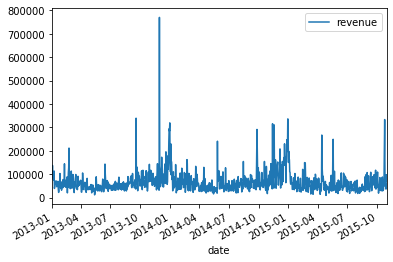

<Figure size 432x288 with 0 Axes>

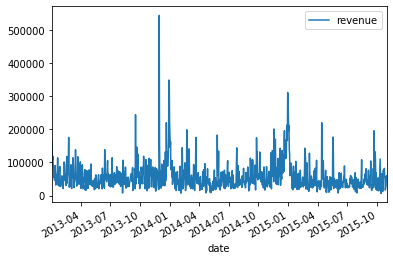

<Figure size 432x288 with 0 Axes>

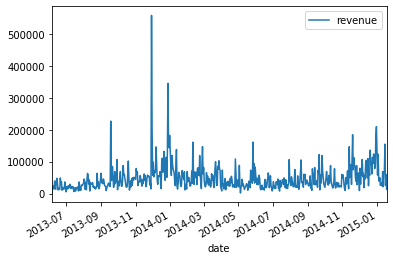

<Figure size 432x288 with 0 Axes>

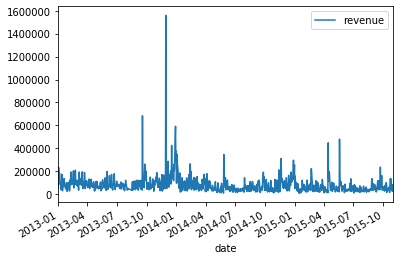

<Figure size 432x288 with 0 Axes>

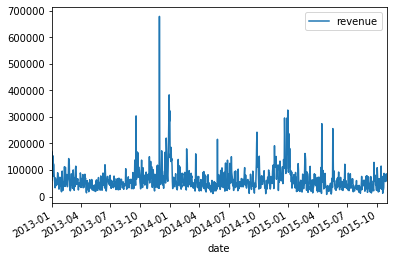

<Figure size 432x288 with 0 Axes>

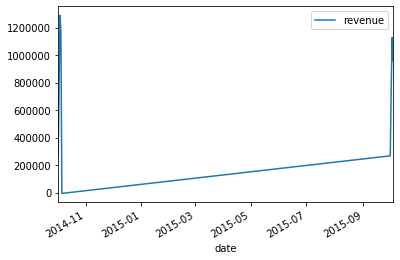

<Figure size 432x288 with 0 Axes>

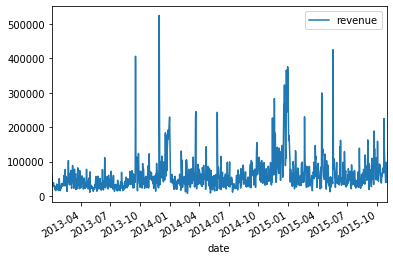

<Figure size 432x288 with 0 Axes>

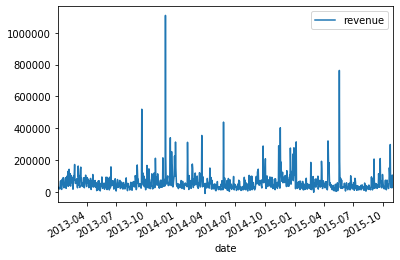

<Figure size 432x288 with 0 Axes>

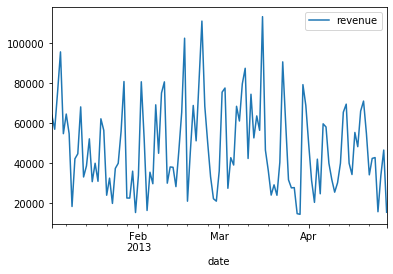

<Figure size 432x288 with 0 Axes>

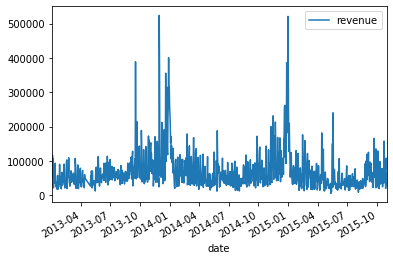

<Figure size 432x288 with 0 Axes>

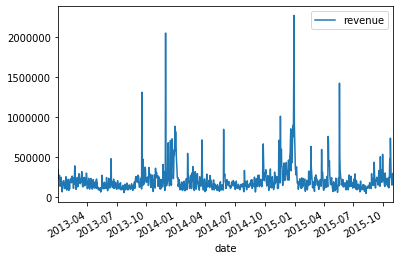

<Figure size 432x288 with 0 Axes>

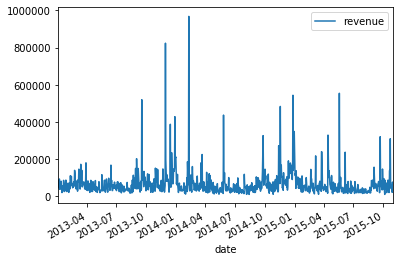

<Figure size 432x288 with 0 Axes>

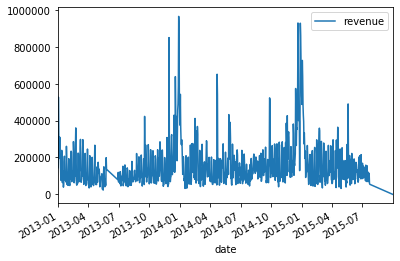

<Figure size 432x288 with 0 Axes>

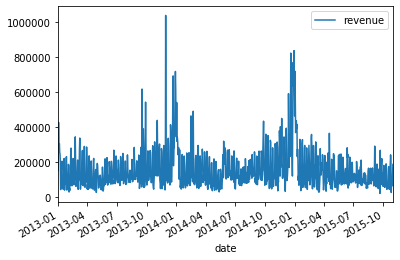

<Figure size 432x288 with 0 Axes>

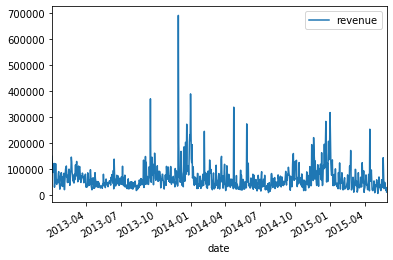

<Figure size 432x288 with 0 Axes>

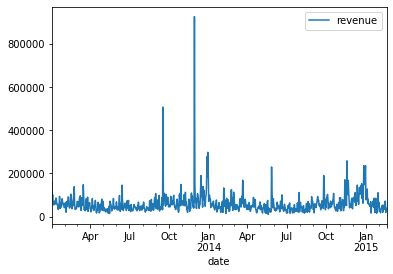

<Figure size 432x288 with 0 Axes>

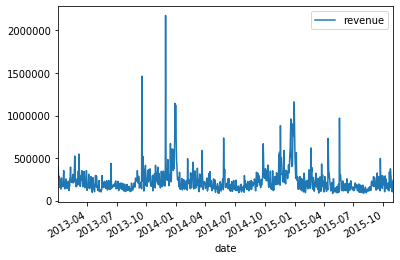

<Figure size 432x288 with 0 Axes>

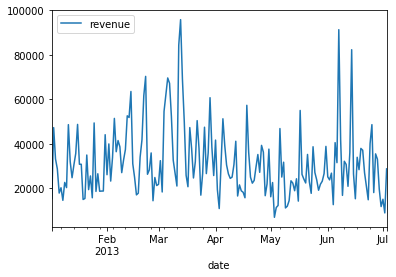

<Figure size 432x288 with 0 Axes>

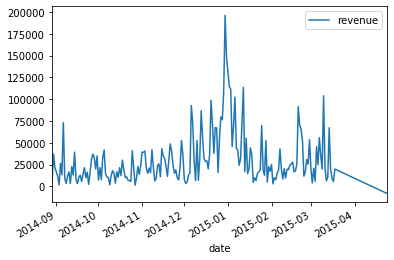

<Figure size 432x288 with 0 Axes>

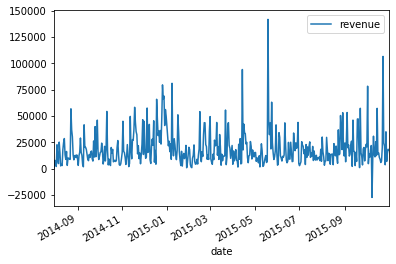

<Figure size 432x288 with 0 Axes>

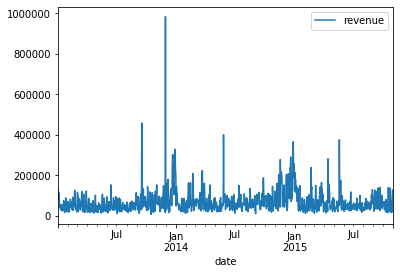

<Figure size 432x288 with 0 Axes>

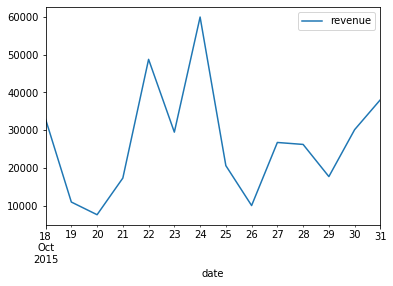

<Figure size 432x288 with 0 Axes>

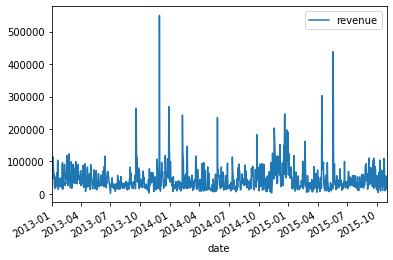

<Figure size 432x288 with 0 Axes>

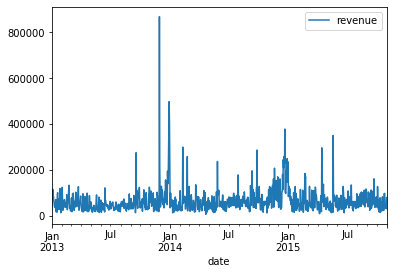

<Figure size 432x288 with 0 Axes>

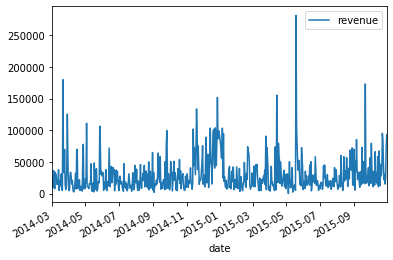

<Figure size 432x288 with 0 Axes>

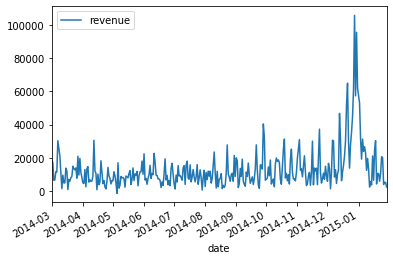

<Figure size 432x288 with 0 Axes>

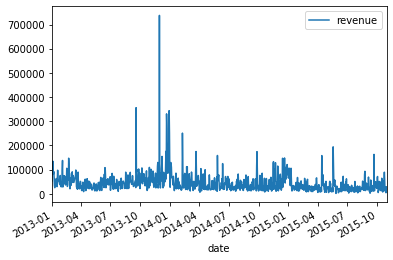

<Figure size 432x288 with 0 Axes>

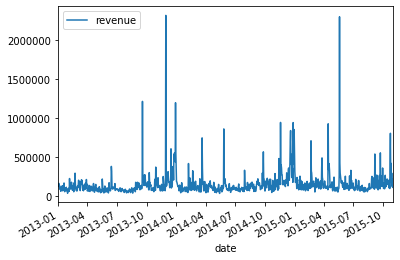

<Figure size 432x288 with 0 Axes>

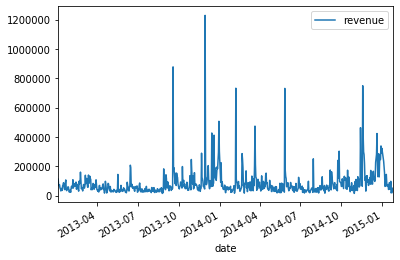

<Figure size 432x288 with 0 Axes>

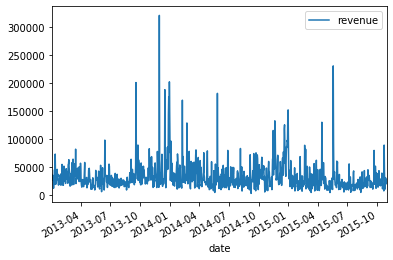

<Figure size 432x288 with 0 Axes>

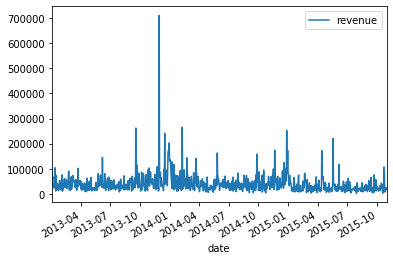

<Figure size 432x288 with 0 Axes>

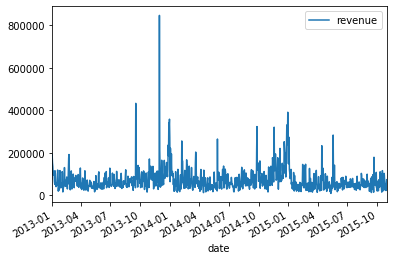

<Figure size 432x288 with 0 Axes>

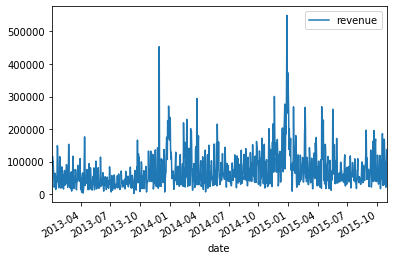

<Figure size 432x288 with 0 Axes>

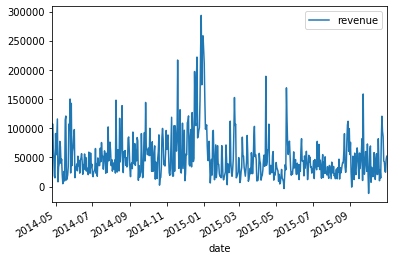

<Figure size 432x288 with 0 Axes>

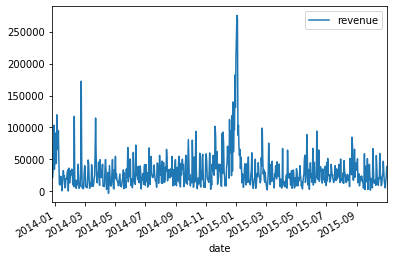

<Figure size 432x288 with 0 Axes>

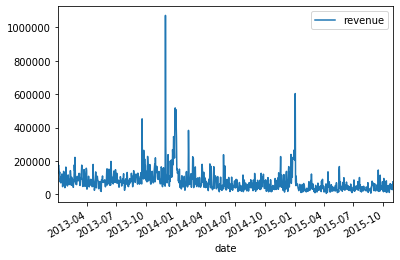

<Figure size 432x288 with 0 Axes>

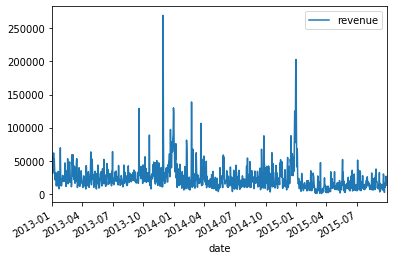

<Figure size 432x288 with 0 Axes>

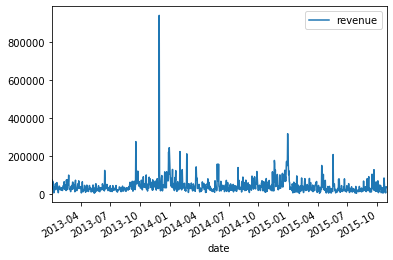

<Figure size 432x288 with 0 Axes>

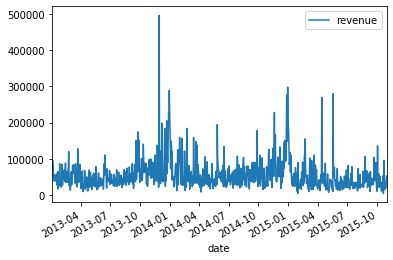

<Figure size 432x288 with 0 Axes>

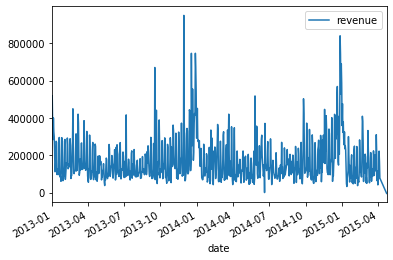

<Figure size 432x288 with 0 Axes>

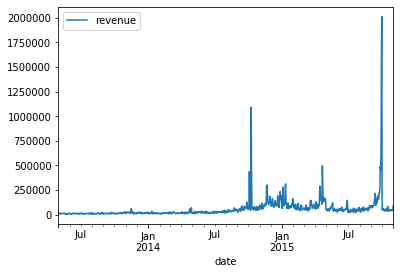

<Figure size 432x288 with 0 Axes>

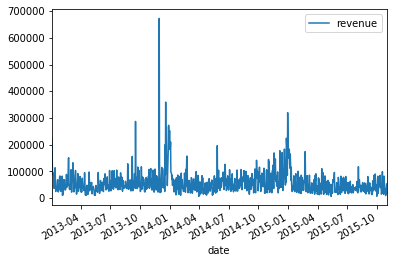

<Figure size 432x288 with 0 Axes>

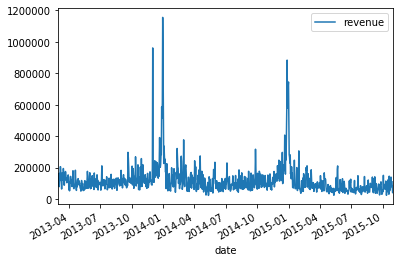

<Figure size 432x288 with 0 Axes>

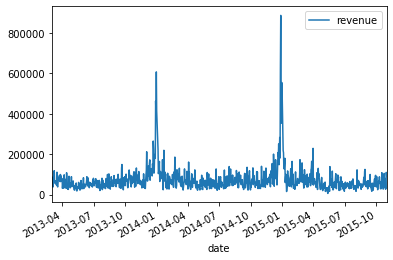

<Figure size 432x288 with 0 Axes>

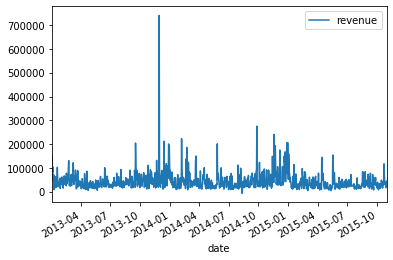

In [38]:
for i in range(60):
    plt.figure()
    rev3.loc[i].set_index('date').plot()

In [69]:
sales0 = transactions.groupby(['shop_id', 'item_id', 'year', 'month']).apply(lambda x: np.sum(x.item_cnt_day))

In [70]:
sales0

shop_id  item_id  year  month
0        30       2013  2        31.0
         31       2013  2        11.0
         32       2013  1         6.0
                        2        10.0
         33       2013  1         3.0
                                 ... 
59       22164    2015  4         2.0
                        7         1.0
         22167    2013  10        1.0
                        12        2.0
                  2014  6         1.0
Length: 1609124, dtype: float64

In [ ]:
rev0.reset_index([1, 2]).loc[9]

In [ ]:
df[df.shop_id == 9].head()

In [ ]:
rev2.loc[9].set_index('date')

In [ ]:
rev_max_date = rev2.groupby(level=0).date.max()
good_shops = rev_max_date[rev_max_date >= '2015-10-30'].index.sort_values()
all_shops = rev_max_date.index.sort_values()

In [ ]:
df2 = df[df.shop_id.isin(good_shops)]

In [ ]:
rev = df2.groupby(['shop_id', 'date']).apply(lambda x: np.dot(x.item_price, x.item_cnt_day)).reset_index(1)

In [ ]:
rev.head()

In [ ]:
rev.columns = rev.columns[:-1].append(pd.Index(['rev']))

In [ ]:
rev2 = rev.reset_index().pivot(index='date', columns='shop_id')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=rev2.columns.shape[0])

In [71]:
cova = rev2.cov()
val, vec = np.linalg.eig(cova)

In [75]:
vv = pd.Series(val)/val.sum()

In [78]:
val[0]

145677874493.39297

In [82]:
v0 = pd.DataFrame(vec).loc[:, 0]

In [95]:
sort_index = np.argsort(val)[::-1]

In [99]:
vala = pd.Series(val[sort_index]) / val.sum()
veca = pd.DataFrame(vec).loc[:, sort_index]

In [103]:
veca.loc[:, 0].sort_values()

22    0.007605
20    0.027289
33    0.031592
6     0.037457
1     0.048719
28    0.049089
25    0.050647
2     0.059555
3     0.060279
32    0.062619
37    0.064910
29    0.070319
26    0.075739
36    0.076411
38    0.079281
41    0.079586
40    0.080369
23    0.081711
10    0.083488
35    0.083550
0     0.087091
31    0.087524
12    0.090171
8     0.095047
9     0.102745
15    0.104252
13    0.105170
24    0.107151
34    0.110362
30    0.117934
5     0.118724
39    0.120132
21    0.127688
14    0.136218
17    0.139922
11    0.149243
18    0.189544
4     0.195069
19    0.344975
27    0.346848
16    0.377419
7     0.504449
Name: 0, dtype: float64

In [ ]:
df2.groupby('shop_id').count()